In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import os
import numpy as np
import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 12})
import re

In [92]:
from polefigure import *
import cristallo as cr
from tabulate import tabulate

In [93]:
# List the .csv files in directory
data_dir = 'export_PoleFig'

filenames = sorted([name for name in os.listdir(data_dir)
                    if name.endswith('.csv')])
print(', '.join(filenames))

figPole_ARB_Cu111.csv, figPole_ARB_Cu200.csv, figPole_ARB_Cu220.csv, figPole_ARB_Nb110.csv, figPole_ARB_Nb112.csv, figPole_ARB_Nb200.csv, figPole_ARB_Nb222.csv, figPole_ARB_Nb321.csv


In [94]:
file_path = os.path.join(data_dir, filenames[0])
phi_deg, psi_deg, data = read_polefig_csv(file_path)

psi_rad = psi_deg *np.pi/180
phi_rad = phi_deg *np.pi/180

psi_stereo = 2*np.tan(psi_rad/2) # Stereographic projection

In [95]:
2*np.tan(-20*np.pi/180 /2)

-0.35265396141692995

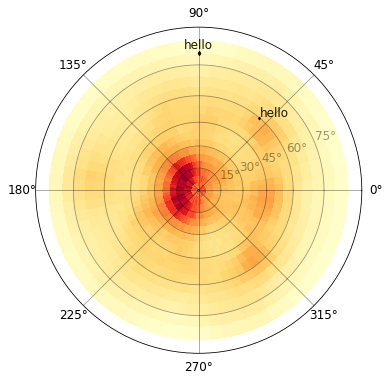

In [96]:
fig, ax = polar_axis()
m = ax.pcolormesh(phi_rad, psi_stereo, data, cmap='YlOrRd')
ax.grid(True, alpha=0.4, color='black')
#fig.colorbar(m)#, cax=cax

plot_direction(ax, 50, 60, label='hello',
              color='black', marker='d',
              label_position='right', markersize=2)

# psi > 90° ?? --> negative, on the other side, but that obvious
plot_direction(ax, 90, 80, label='hello',
               color='black', marker='d', label_position='center')

In [97]:
def plot_many_directions(ax, directions, 
                         color='black', marker='d', markersize=3,
                         label=None, label_position='right', text_bold=False):
    for d in directions:
        plot_direction(ax, d['phi'], d['psi'], label=d['hkl'],
                       color=color, marker=marker, markersize=markersize,
                       label_position=label_position, text_bold=text_bold)

In [98]:
#time_step = get_field(filename, 'Time per step')
#raw_data = all_data[filename] / time_step # count per second
#normed_data = pad_and_norm(raw_data)
#colormap = 'YlOrRd' if 'Cu' in filename else 'GnBu'

pole figure annotation

- the pole figure basis is (phi=0°, phi=90°, normal psi=0°)

To add crystal directions, the basis vectors (phi0, phi90, n) have to be
writen using the crystal lattice basis (a, b, c), i.e. using Miller indices hkl (cubic system ?)


since phi90 is perpendicular to phi0 and n, only phi0 and n are needed

In [86]:
phi, psi = cr.phi_psi_angles((1, 0, 1), (1, 0, 0), (0, 0, 1))

In [101]:
hkl_figure = (1, 0, 0)
eq_directions = cr.equivalent_directions(hkl_figure)

In [102]:
# Variant
n = (1, 1, 2)
phi0 = (1, -1, 0)

In [104]:
eq_dir = list_eq_directions(hkl_figure, phi0, n)
print(tabulate(eq_dir, headers='keys'))

  hkl       phi      psi
-----  --------  -------
  100   39.2315  65.9052
  001  -90       35.2644
  010  140.768   65.9052


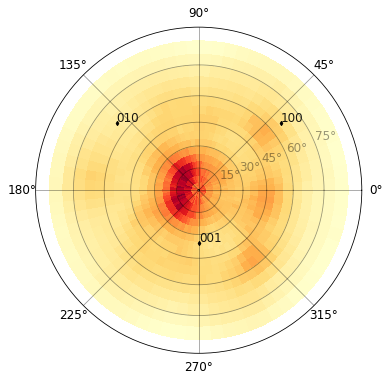

In [105]:
fig, ax = polar_axis()
m = ax.pcolormesh(phi_rad, psi_stereo, data, cmap='YlOrRd')
ax.grid(True, alpha=0.4, color='black')
#fig.colorbar(m)#, cax=cax

plot_many_directions(ax, eq_dir, 
                         color='black', marker='d', markersize=3,
                         label=None, label_position='right', text_bold=False)

In [23]:
[hkl_tuple_to_str(hkl) for hkl in eq_directions]

['11-1', '-111', '1-1-1', '-1-11', '1-11', '-1-1-1', '-11-1', '111']

In [11]:
cr.phi_psi_angles((1, 0, 1), (1, 0, 0), (0, 0, 1))

(0.0, 45.00000009614413)

In [12]:
# Groups of crystallite orientations:
variants = [{'n':(1, 1, 2), 'phi0':(1, -1, 0),
             'color':'royalblue', 'label_align':'baseline', 'showaxis':True},]

In [13]:
def plot_variant(ax, variant, )
    # Variant
    for phi, psi, hkl in phi_psi_hkl:
        if psi > 90: continue
        hkl_name = '%s%s%s' % tuple(hkl)
        psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # Stereographic projection
        
        psi_stereo_annotate = psi_stereo if psi_stereo>0.1 else 0.1 
        
        va = 'center' if align == 'right' else 'baseline'
        ha = 'center' if align == 'baseline' else 'left'
        
        ax.annotate(hkl_name, (phi*np.pi/180+0.001, psi_stereo_annotate), # Bug.. ?
                   textcoords='offset points', xytext=(0, 5),
                   rotation=0, alpha=0.9, color=color, family='sans-serif',
                   horizontalalignment=ha, va=va, weight='bold')
        
        ax.plot(phi*np.pi/180, psi_stereo, symbol, color=color)  

SyntaxError: invalid syntax (<ipython-input-13-cb748bbb912b>, line 1)

In [ ]:
def plot_group_poles(ax, hkl_eq, n, phi0, color='r', symbol='o', align='baseline', showaxis=True):
    ''' Add on the graph `ax` points corresponding to equivalent dirctions 
        `hkl_eq` tuple of (h, k, l) value
        
        n: tuple, normal direction
        phi0: tuple, direction corresponding to phi=0°
    '''
    dirs = cr.equivalent_directions(hkl_eq)
    phi_psi_hkl = [(*cr.get_phi_psi(hkl, n, phi0), hkl) for hkl in dirs]
    
    # Axe annotation:
    if showaxis:
        ax.plot(0, 0, '^', color='k')  
        ax.plot(0, 2, '^', color='k')
        ax.annotate('%s%s%s' % tuple(n), (270, 0.1), # Bug.. ?
                   textcoords='offset points', xytext=(0, -15),
                   rotation=0, alpha=0.9, color='k', family='sans-serif',
                   horizontalalignment='right', va='baseline', weight='bold')
        ax.annotate('%s%s%s' % tuple(phi0), (0.01, 1.99), # Bug.. ?
                   textcoords='offset points', xytext=(0, -15),
                   rotation=0, alpha=0.9, color='k', family='sans-serif',
                   horizontalalignment='right', va='baseline', weight='bold')
    
    # Variant
    for phi, psi, hkl in phi_psi_hkl:
        if psi > 90: continue
        hkl_name = '%s%s%s' % tuple(hkl)
        psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # Stereographic projection
        
        psi_stereo_annotate = psi_stereo if psi_stereo>0.1 else 0.1 
        
        va = 'center' if align == 'right' else 'baseline'
        ha = 'center' if align == 'baseline' else 'left'
        
        ax.annotate(hkl_name, (phi*np.pi/180+0.001, psi_stereo_annotate), # Bug.. ?
                   textcoords='offset points', xytext=(0, 5),
                   rotation=0, alpha=0.9, color=color, family='sans-serif',
                   horizontalalignment=ha, va=va, weight='bold')
        
        ax.plot(phi*np.pi/180, psi_stereo, symbol, color=color)   
        
        